# Dave - Modèles d'apprentissage (peu) profonds

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import argparse
import torch
import time

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
data = pd.read_csv("cleaned_data.csv")
X = data.iloc[:,0:-1]
Y = data.iloc[:,-1]
y = np.zeros((len(Y), 10))
for i in range(len(Y)):
    y[i][int(Y[i])] = 1 
labels = ["C201", "C203", "C204", "C205", "C206", "C207", "C208", "C210", "DC", "MC"]

## I - Chargement, partionnement et normalisation des données

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# define training hyperparameters
INIT_LR = 1e-3
BATCH_SIZE = 64
EPOCHS = 75
# define the train and val splits
TRAIN_SPLIT = 0.9
VAL_SPLIT = 1 - TRAIN_SPLIT
# set the device we will be using to train the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=VAL_SPLIT, random_state=42)

## II - Modèle séquentiel

#### A) Entraînement

In [7]:
model = Sequential()
model.add(Dense(51, input_shape=(51,), activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

In [8]:
st = time.time()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=EPOCHS, batch_size=10)
et = time.time()
elapsed = et - st
print("Exec time: %f seconds" % elapsed)

Epoch 1/75
432/432 [==============================] - 3s 4ms/step - loss: 0.2436 - accuracy: 0.5924 - val_loss: 0.1175 - val_accuracy: 0.9042
Epoch 2/75
432/432 [==============================] - 1s 3ms/step - loss: 0.0779 - accuracy: 0.9391 - val_loss: 0.0560 - val_accuracy: 0.9375
Epoch 3/75
432/432 [==============================] - 1s 3ms/step - loss: 0.0407 - accuracy: 0.9590 - val_loss: 0.0352 - val_accuracy: 0.9583
Epoch 4/75
432/432 [==============================] - 1s 3ms/step - loss: 0.0268 - accuracy: 0.9692 - val_loss: 0.0247 - val_accuracy: 0.9667
Epoch 5/75
432/432 [==============================] - 1s 3ms/step - loss: 0.0192 - accuracy: 0.9769 - val_loss: 0.0210 - val_accuracy: 0.9708
Epoch 6/75
432/432 [==============================] - 1s 3ms/step - loss: 0.0144 - accuracy: 0.9854 - val_loss: 0.0156 - val_accuracy: 0.9812
Epoch 7/75
432/432 [==============================] - 1s 3ms/step - loss: 0.0115 - accuracy: 0.9891 - val_loss: 0.0125 - val_accuracy: 0.9875
Epoch 

Epoch 57/75
432/432 [==============================] - 1s 3ms/step - loss: 6.3388e-05 - accuracy: 1.0000 - val_loss: 1.3983e-04 - val_accuracy: 1.0000
Epoch 58/75
432/432 [==============================] - 1s 3ms/step - loss: 2.8816e-04 - accuracy: 0.9993 - val_loss: 0.0026 - val_accuracy: 0.9937
Epoch 59/75
432/432 [==============================] - 1s 3ms/step - loss: 4.8730e-05 - accuracy: 1.0000 - val_loss: 7.4250e-05 - val_accuracy: 1.0000
Epoch 60/75
432/432 [==============================] - 1s 3ms/step - loss: 5.9178e-05 - accuracy: 1.0000 - val_loss: 2.1333e-04 - val_accuracy: 1.0000
Epoch 61/75
432/432 [==============================] - 1s 3ms/step - loss: 4.7254e-05 - accuracy: 1.0000 - val_loss: 7.9000e-05 - val_accuracy: 1.0000
Epoch 62/75
432/432 [==============================] - 1s 3ms/step - loss: 3.4648e-05 - accuracy: 1.0000 - val_loss: 1.1384e-04 - val_accuracy: 1.0000
Epoch 63/75
432/432 [==============================] - 1s 3ms/step - loss: 2.5708e-04 - accuracy: 

#### B) Phase de test

In [9]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

38/38 [==============================] - 0s 3ms/step - loss: 4.0185e-04 - accuracy: 0.9992
Accuracy: 99.92


####  C) Sauvegarde et résultats

In [10]:
import pickle
with open("model_nn.sav", "wb") as file:
    pickle.dump(model, file)

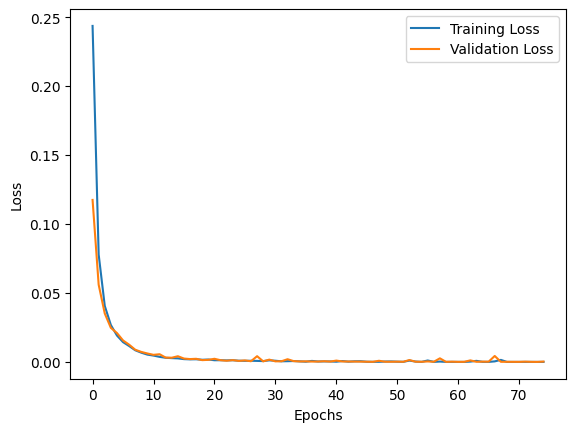

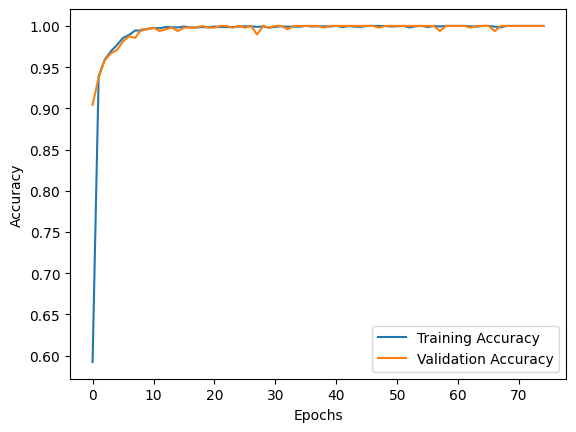

In [11]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()